In [287]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

## Prepare data

We will work with a set of points with 2 values: 0 or 1.

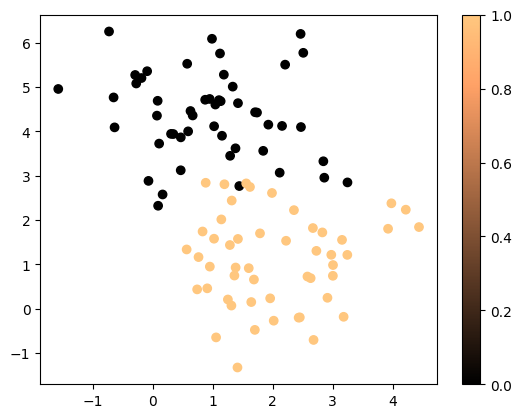

In [288]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

plt.scatter(X[:,0], X[:,1], c=y, cmap="copper")
plt.colorbar()
plt.show()

## Construct Deep Learning functions

In [289]:
def initialization(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return (W, b)

W, b = initialization(X)

In [290]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

A = model(X, W, b)

In [291]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1-y) * np.log(1-A))

print(log_loss(A, y))

1.2055172404740604


In [292]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A-y)
    db = 1 / len(y) * np.sum(A-y)
    return (dW, db)

dW, db = gradients(A, X, y)

In [293]:
def update(dW, db, W, b, learning_rate):
     W = W - learning_rate * dW
     b = b - learning_rate * db
     return(W, b)


W, b = update(dW, db, W, b, 1)

In [294]:
print("Shapes:")
print("X :", X.shape)
print("Y :", y.shape)
print("W :", W.shape)
print("b :", b.shape)
print("A :", A.shape)
print("dW:", dW.shape)
print("db:", db.shape)

Shapes:
X : (100, 2)
Y : (100, 1)
W : (2, 1)
b : (1,)
A : (100, 1)
dW: (2, 1)
db: ()


## Create a neuron

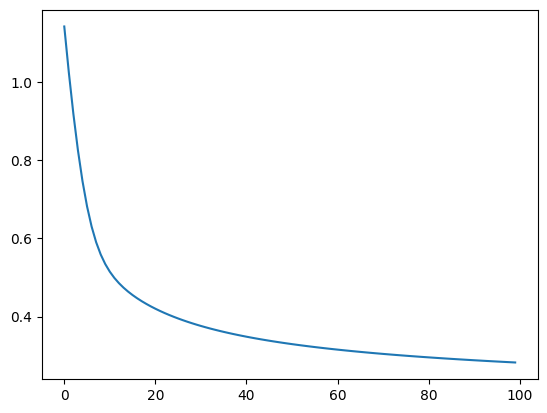

In [295]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    W, b = initialization(X)
    
    history = []
    loss = []
    
    # Training
    for i in range(n_iter):
        A = model(X, W, b)
        loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        
        # create history when loss decrease by 5%
        if i == 0 or loss[-1] < loss_ref*0.95:
            loss_ref = loss[-1]
            history.append([W, b, loss, i])

    return (W, b, loss, history)

W, b, loss, history = artificial_neuron(X, y)
plt.plot(loss)
plt.show()

## Prediction

Model precision: 86.0%
Value of the red dot: 0.84


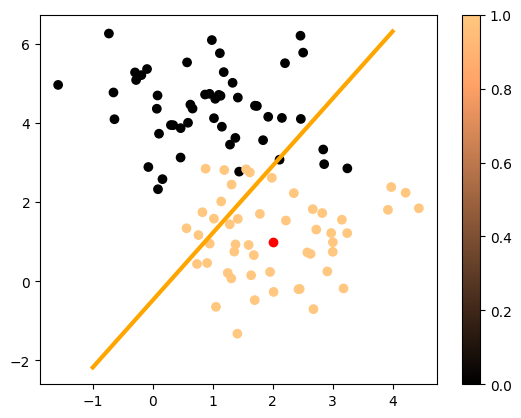

In [296]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

new_plant = np.array([2, 1])
y_pred = predict(X, W, b)
print(f"Model precision: {accuracy_score(y, y_pred)*100}%")
print(f"Value of the red dot: {model(new_plant, W, b)[0]:.2}")

x0 = np.linspace(-1, 4, 100)
x1 = (-W[0]*x0 - b) / W[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap="copper")
plt.colorbar()
plt.scatter(new_plant[0], new_plant[1], c="r")
plt.plot(x0, x1, c="orange", lw=3)
plt.show()

## Animation

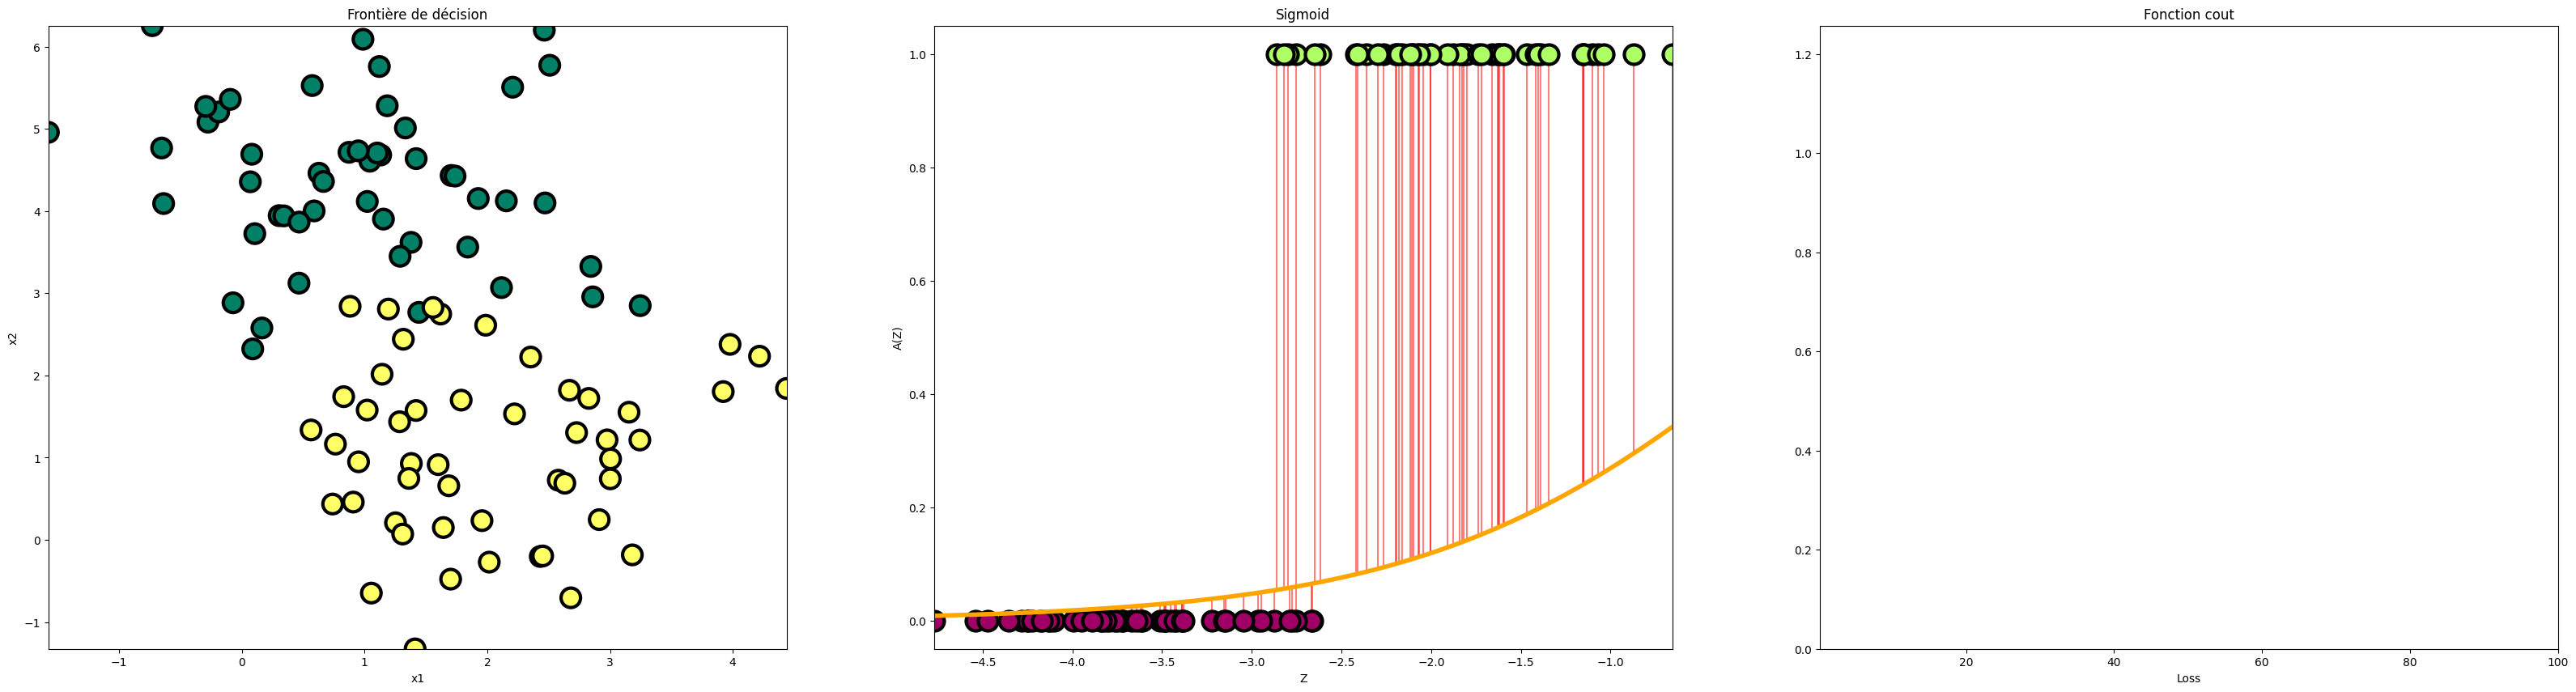

In [297]:
def animate(param):
    W = param[0]
    b = param[1]
    loss = param[2]
    i = param[3]
    
    ax[0].clear() # decision frontier
    ax[1].clear() # sigmoid
    ax[2].clear() # cost function
    
    s = 300
    # decision frontier
    ax[0].scatter(X[:,0], X[:,1], c=y, s=s, cmap="summer", edgecolors="k", linewidths=3)
    
    xlim = ax[0].get_xlim()
    ylim = ax[0].get_ylim()
    
    x1 = np.linspace(-3, 6, 100)
    x2 = (-W[0]*x1 - b) / W[1]
    ax[0].plot(x1, x2, c="orange", lw=4)
    
    ax[0].set_xlim(X[:,0].min(), X[:,0].max())
    ax[0].set_ylim(X[:,1].min(), X[:,1].max())
    ax[0].set_title("Frontière de décision")
    ax[0].set_xlabel("x1")
    ax[0].set_ylabel("x2")
    
    # sigmoid
    z = X.dot(W) + b
    z_new = np.linspace(z.min(), z.max(), 100)
    A = 1 / (1 + np.exp(-z_new))
    ax[1].plot(z_new, A, c="orange", lw=4)
    ax[1].scatter(z[y==0], np.zeros(z[y==0].shape), c="#a00066", edgecolors="k", linewidths=3, s=s)
    ax[1].scatter(z[y==1], np.ones(z[y==1].shape), c="#afff66", edgecolors="k", linewidths=3, s=s)
    
    for j in range(len(A[y.flatten()==0])):
        ax[1].vlines(z[y==0][j], ymin=0, ymax=1 / (1 + np.exp(-z[y==0][j])), color="red", alpha=0.5, zorder=-1)
    
    for j in range(len(A[y.flatten()==1])):
        ax[1].vlines(z[y==1][j], ymax=1, ymin=1 / (1 + np.exp(-z[y==1][j])), color="red", alpha=0.5, zorder=-1)
    
    ax[1].set_xlim(z.min(), z.max())
    ax[1].set_title("Sigmoid")
    ax[1].set_xlabel("Z")
    ax[1].set_ylabel("A(Z)")
    
    
    # cost function
    ax[2].plot(range(i), loss[:i], color="red", lw=4)
    ax[2].set_xlim(loss[-1]*0.8, len(loss))
    ax[2].set_ylim(0, loss[0]*1.1)
    ax[2].set_title("Fonction cout")
    ax[2].set_xlabel("iteration")
    ax[2].set_xlabel("Loss")


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(40, 10))
ani = FuncAnimation(fig, animate, frames=history, interval=200, repeat=False)
ani.save("01_animation.gif", writer="pillow")